### 資料來源：政府開放資料平台 - 不動產買賣實價登錄批次資料 (http://data.gov.tw/node/6213) - 台北市資料

# 一、資料匯入

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文 (for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊

df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5')
df[:2]

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,大同區,房地(土地+建物),臺北市大同區南京西路91~120號,6.34,住,NaN,NaN,1040303,土地1建物1車位0,八層,十一層,住宅大樓(11層含以上有電梯),商業用,鋼筋混凝土造,831111.0,55.19,1,1,1,有,有,12900000,233738.0,NaN,0.0,0,NaN,RPPOMLMKPHMFFBA57CA
1,內湖區,房地(土地+建物),臺北市內湖區康樂街136巷3弄1~30號,4.96,商,NaN,NaN,1050817,土地1建物1車位0,二層,九層,華廈(10層含以下有電梯),商業用,鋼筋混凝土造,850705.0,38.79,1,1,1,有,有,4300000,110853.0,NaN,0.0,0,NaN,RPSNMLTJRHLFFCA58CA


# 二、資料預處理(一)

## 2.1 交易標的:非土地、車位交易

In [2]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
土地,215.995593,NaN,NaN,1.059181e+06,NaN,0.000000,0.000000,0.000000,0.000000,7.343879e+06,123041.372881,0.000000,0.000000e+00
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,5.636200e+06,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1.472509e+07,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4.283112e+07,191406.018605,34.382361,1.393102e+06
車位,2.486136,NaN,NaN,1.060058e+06,908492.702703,41.700682,0.000000,0.000000,0.000000,2.502386e+06,NaN,30.595227,2.368295e+06


In [3]:
# 去除土地和車位兩種交易資料
df = df[(df['交易標的']!='土地') & (df['交易標的']!='車位')].reset_index(drop=True)

In [4]:
df.loc[:,'總價元'] = df.loc[:,'總價元']/10000

In [5]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,非都市土地使用分區,非都市土地使用編定,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價每平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,,,
建物,0.000000,NaN,NaN,1.054469e+06,941057.222222,80.709000,1.000000,0.600000,1.100000,563.620000,82164.800000,0.000000,0.000000e+00
房地(土地+建物),22.567617,NaN,NaN,1.059772e+06,765348.258373,86.596289,2.189453,1.447266,1.380859,1472.509301,166718.550781,0.000000,0.000000e+00
房地(土地+建物)+車位,36.521667,NaN,NaN,1.058768e+06,967275.413953,228.741806,2.430556,1.504630,1.597222,4283.111866,191406.018605,34.382361,1.393102e+06


## 2.2 產生特徵：交易年/屋齡

In [6]:
print(df.loc[0,'交易年月日'])
print(type(df.loc[0,'交易年月日']))

1040303
<class 'numpy.int64'>


In [7]:
#新增交易年欄位
for i in range(len(df)):
    df.loc[i,'交易年'] = round(df.loc[i,'交易年月日']/10000)

In [8]:
from datetime import datetime
now = datetime.now()
now.year

2019

In [9]:
#新增屋齡欄位
for i in range(len(df)):
    df.loc[i,'建築完成年'] = round(df.loc[i,'建築完成年月']/10000)
    df.loc[i, '屋齡'] = now.year - (1911 + round(df.loc[i,'建築完成年月']/10000))

In [10]:
df.sample(1)

,鄉鎮市區,交易標的,土地區段位置或建物區門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價每平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,建築完成年,屋齡
500,中山區,房地(土地+建物),臺北市中山區新生北路二段91~120號,3.1,商,NaN,NaN,1060519,土地1建物1車位0,九層,十四層,住宅大樓(11層含以上有電梯),商業用,鋼筋混凝土造,760305.0,38.09,1,1,1,有,有,357.1608,93768.0,NaN,0.0,0,親友、員工或其他特殊關係間之交易。,RPRNMLLJPHMFFCA57CA,106.0,76.0,32.0


# 三、資料探索

## 3.1 各鄉鎮資料筆數

Text(0, 0.5, '資料筆數')

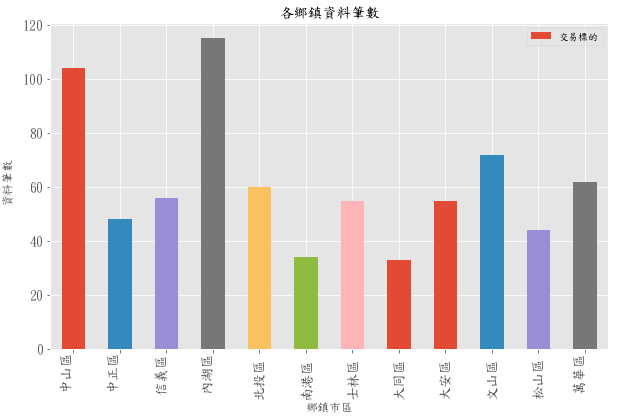

In [11]:
ax = df.groupby('鄉鎮市區').count().plot(kind='bar', y='交易標的',figsize=(10,6),fontsize=14,title='各鄉鎮資料筆數')
ax.set_ylabel('資料筆數')

## 3.2相關性分析

In [12]:
corr = df[['總價元','土地移轉總面積平方公尺','建物移轉總面積平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年']].corr()

In [13]:
corr

,總價元,土地移轉總面積平方公尺,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年
總價元,1.000000,0.718356,0.897664,0.037094,-0.051536,0.062915,0.472775,0.517171,-0.351787,0.351787,-0.044518
土地移轉總面積平方公尺,0.718356,1.000000,0.837357,0.218130,0.107488,0.168725,0.236906,0.215380,-0.090268,0.090268,0.006141
建物移轉總面積平方公尺,0.897664,0.837357,1.000000,0.072909,-0.027742,0.056027,0.451150,0.384596,-0.303746,0.303746,-0.048933
建物現況格局-房,0.037094,0.218130,0.072909,1.000000,0.664950,0.761660,0.016739,-0.012425,0.101536,-0.101536,-0.032178
建物現況格局-廳,-0.051536,0.107488,-0.027742,0.664950,1.000000,0.547287,-0.049335,-0.076489,0.051712,-0.051712,-0.001068
建物現況格局-衛,0.062915,0.168725,0.056027,0.761660,0.547287,1.000000,0.009501,-0.009853,-0.025424,0.025424,-0.070500
車位移轉總面積平方公尺,0.472775,0.236906,0.451150,0.016739,-0.049335,0.009501,1.000000,0.741627,-0.462698,0.462698,-0.096084
車位總價元,0.517171,0.215380,0.384596,-0.012425,-0.076489,-0.009853,0.741627,1.000000,-0.357414,0.357414,-0.061319
屋齡,-0.351787,-0.090268,-0.303746,0.101536,0.051712,-0.025424,-0.462698,-0.357414,1.000000,-1.000000,0.142024
建築完成年,0.351787,0.090268,0.303746,-0.101536,-0.051712,0.025424,0.462698,0.357414,-1.000000,1.000000,-0.142024


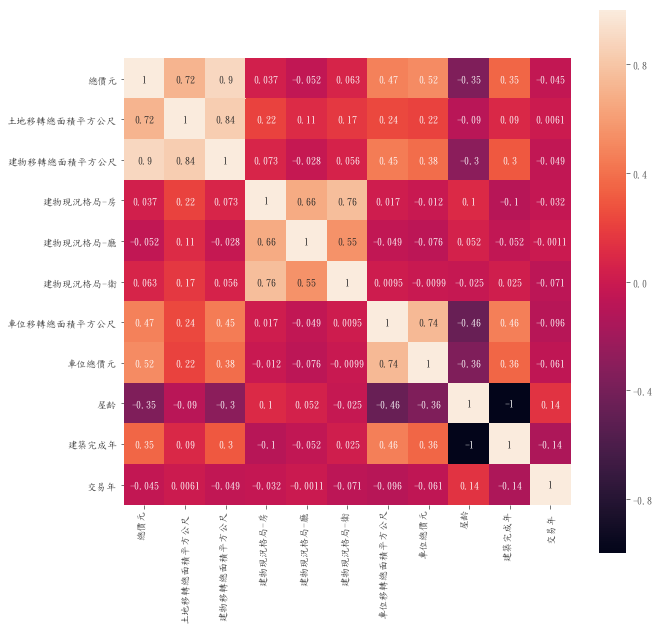

In [14]:
#繪製相關性圖
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)
plt.show()

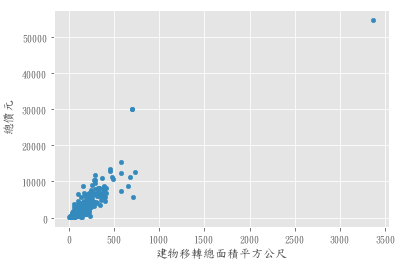

In [15]:
df.plot(kind='scatter', x='建物移轉總面積平方公尺', y='總價元')

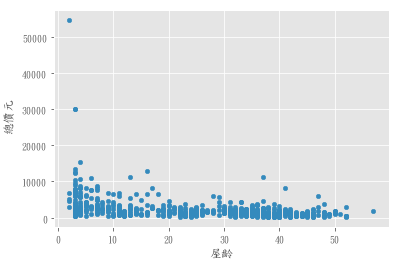

In [16]:
df.plot(kind='scatter', x='屋齡', y='總價元')

## 3.3 各鄉鎮比較

In [17]:
df2 = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年', '總價元']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元
鄉鎮市區,,,,,,,,,,,,
中山區,16.297692,105.000096,182520.461538,2.076923,1.375000,1.519231,7.903173,479519.230769,22.096774,85.903226,105.903846,2139.697917
中正區,17.749583,113.277500,203961.895833,1.708333,1.145833,1.187500,5.110417,277083.333333,24.743590,83.256410,105.833333,2477.166704
信義區,28.029821,127.634286,189706.750000,2.267857,1.428571,1.446429,8.865714,298214.285714,29.780488,78.219512,105.946429,2314.053964
內湖區,37.064609,182.183652,162547.035088,2.521739,1.530435,1.547826,17.334609,478695.652174,21.176991,86.823009,105.652174,2892.934783
北投區,28.839167,133.713000,142094.283333,2.050000,1.366667,1.350000,17.170833,734166.666667,21.016667,86.983333,105.866667,1960.550000
南港區,31.355000,156.041176,164861.647059,2.294118,1.529412,1.500000,15.133824,555882.352941,16.142857,91.857143,105.970588,2641.029412
士林區,33.232364,148.830000,179288.290909,2.309091,1.563636,1.545455,15.637818,938181.818182,30.109091,77.890909,106.000000,3244.573075
大同區,18.098182,108.097576,142900.272727,2.212121,1.454545,1.303030,7.021212,192424.242424,24.185185,83.814815,105.909091,1549.110000
大安區,22.519455,126.577636,247827.327273,2.163636,1.436364,1.400000,6.381818,252727.272727,25.722222,82.277778,106.000000,3099.045173


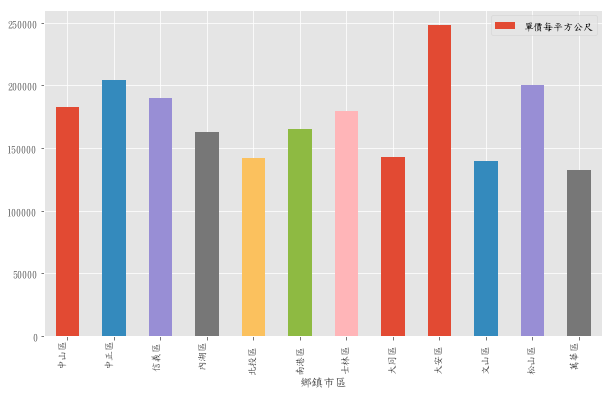

In [18]:
df2.groupby('鄉鎮市區').mean().plot(kind='bar', y='單價每平方公尺', figsize=(10,6))

# 四、資料預處理(二) - 機器學習

## 4.1 針對鄉鎮市區做one-hot encoding

In [19]:
df_region = pd.get_dummies(df['鄉鎮市區'])
df_region.head()

,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [20]:
#合併dataframe
df_ml = pd.merge(df2, df_region, left_index=True, right_index=True)
df_ml.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
0,大同區,6.34,55.19,233738.0,1,1,1,0.00,0,25.0,83.0,104.0,1290.0,0,0,0,0,0,0,0,1,0,0,0,0
1,內湖區,4.96,38.79,110853.0,1,1,1,0.00,0,23.0,85.0,105.0,430.0,0,0,0,1,0,0,0,0,0,0,0,0
2,內湖區,13.72,149.24,160815.0,3,2,2,12.96,0,11.0,97.0,105.0,2400.0,0,0,0,1,0,0,0,0,0,0,0,0
3,內湖區,22.45,136.20,149046.0,3,2,1,34.60,0,11.0,97.0,105.0,2030.0,0,0,0,1,0,0,0,0,0,0,0,0
4,內湖區,33.51,242.78,197216.0,5,2,2,51.07,0,15.0,93.0,105.0,4788.0,0,0,0,1,0,0,0,0,0,0,0,0


## 4.2 去除遺失值和極端值

In [21]:
df_ml = df_ml.dropna().reset_index(drop=True)

In [22]:
df_ml = df_ml[df_ml['建物移轉總面積平方公尺']<1000]

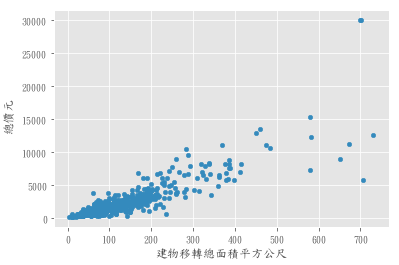

In [23]:
df_ml.plot(kind='scatter', x='建物移轉總面積平方公尺', y = '總價元')

# 五、簡單線性迴歸

## 5.1 使用Scikit-Learn SGDRegressor

In [24]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
X_train.head()

,建物移轉總面積平方公尺
78,33.53
337,192.24
357,64.02
305,43.01
383,135.91


## 5.1.2 特徵標準化(Standardization)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

## 5.1.3訓練模型

各變項參數: [2463.86856833]
MSE: 1187683.24
R Square: 0.7275613687537759


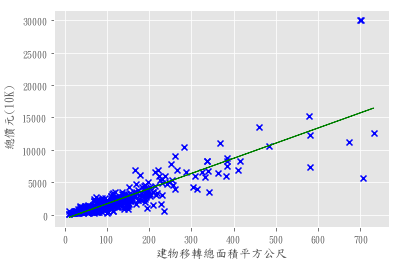

In [26]:
from sklearn import datasets, linear_model

#SGDRegressor的input y需要一維矩陣type
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

#linear regression
sgdr = linear_model.SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.001)

#訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:", sgdr.score(X_test_normalized, y_test_1d))

plt.scatter(X_train['建物移轉總面積平方公尺'], y_train_1d, color='blue', marker='x')

plt.plot(X_train, sgdr.predict(X_train_normalized), color='green', linewidth=1)

plt.ylabel('總價元(10K)')
plt.xlabel('建物移轉總面積平方公尺')

plt.show()

## 5.1.4 K折交叉驗證 (K-fold Cross-Validation) + 學習曲線 (Learning Curve)

In [27]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, 
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

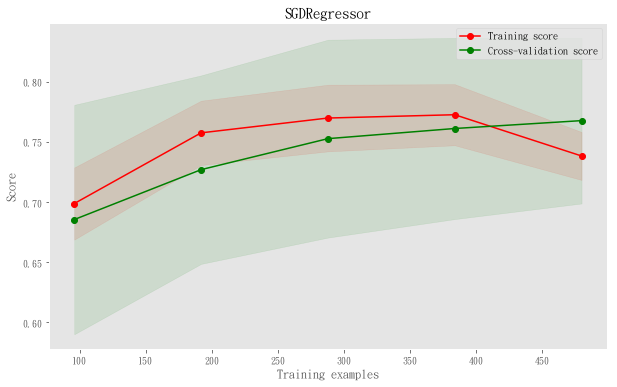

In [28]:
from sklearn.model_selection import KFold,StratifiedKFold

cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator=linear_model.SGDRegressor(max_iter=1000, learning_rate='constant',
                                   eta0=0.01)
sc.fit(X_train)
plot_learning_curve(estimator, "SGDRegressor", sc.transform(X), 
                    y.values.ravel(), cv=cv, 
                    train_sizes=np.linspace(.2, 1.0, 5))

##  5.2 使用Scikit-Learn LinearRegression

各變項變數 [[2429.56604812]]
MSE: 1156764.51
R Square: 0.7346537113089795


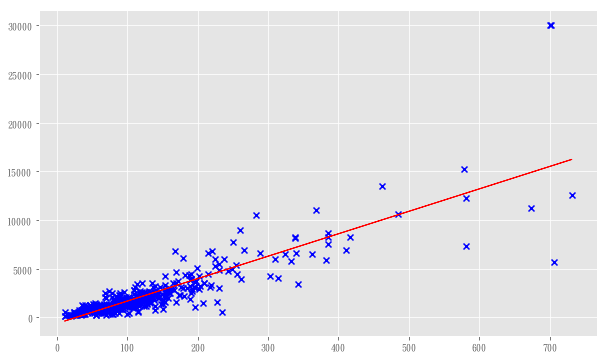

In [29]:
#liner regression
regr = linear_model.LinearRegression()

#訓練模型
regr.fit(X_train_normalized, y_train)

print('各變項變數', regr.coef_)
print('MSE: %.2F' % np.mean((regr.predict(X_test_normalized)-y_test)**2))
print('R Square:', regr.score(X_test_normalized, y_test))

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', marker='x')
plt.plot(X_train, regr.predict(X_train_normalized), color='red', linewidth=1)

<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

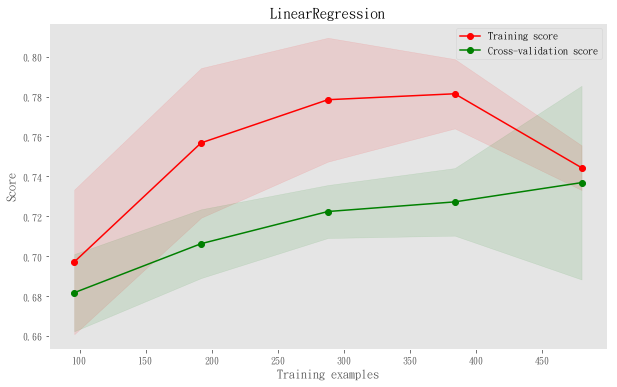

In [30]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimator = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimator, "LinearRegression", sc.transform(X), 
                    y.values.ravel(), cv=cv, train_sizes=np.linspace(0.2,1.0,5))

## 六、多變項線性迴歸
### 6.1 切分訓練及測試資料 (2 features)

In [31]:
X = df_ml[['建物移轉總面積平方公尺','屋齡']]
y = df_ml[['總價元']]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train.head()

,建物移轉總面積平方公尺,屋齡
370,108.32,39.0
295,161.64,3.0
591,75.35,34.0
486,84.35,36.0
332,18.46,42.0


### 6.1 特徵標準化 (Standardization)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalized = sc.transform(X_train)
X_test_normalized = sc.transform(X_test)

### 6.2 使用Scikit-Learn LinearRegression

In [34]:
#linear regression
regr = linear_model.LinearRegression()

#訓練模型
regr.fit(X_train_normalized, y_train)

print("各變項參數:", regr.coef_)
print("MSE: %0.2f" % np.mean((regr.predict(X_test_normalized) - y_test)**2))
print("R Square:", regr.score(X_test_normalized, y_test))

各變項參數: [[2381.0968451 -153.0243931]]
MSE: 737126.83
R Square: 0.8072454365955373


<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

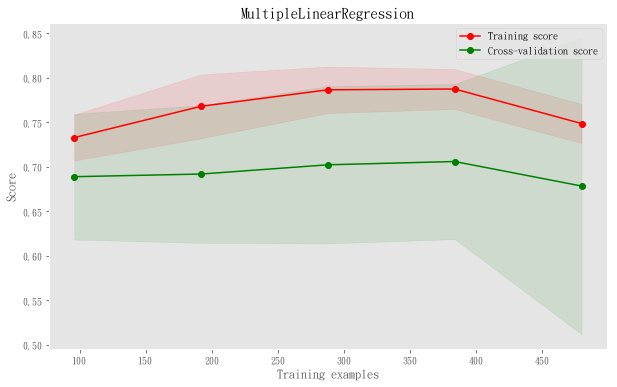

In [35]:
#k-fold cross validation + learning curve
cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimater = linear_model.LinearRegression()

sc.fit(X_train)
plot_learning_curve(estimater, "MultipleLinearRegression", sc.transform(X), 
                    y.values.ravel(), cv=cv, train_sizes = np.linspace(0.2,1,5))

### 6.3 使用Scikit-Learn SGDRegressor

In [36]:
#轉成1維array
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

#SGD Regressor
sgdr = linear_model.SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)

#訓練模型
sgdr.fit(X_train_normalized, y_train_1d)

print('各變項參數:', sgdr.coef_)
print("MSE: %.2f" % np.mean((sgdr.predict(X_test_normalized) - y_test_1d) ** 2))
print("R Square:",sgdr.score(X_test_normalized,y_test_1d))

各變項參數: [2170.37553836 -226.98763646]
MSE: 744813.81
R Square: 0.8052353329403984


<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

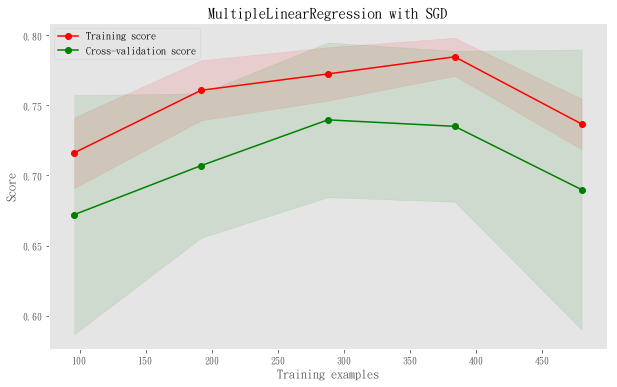

In [37]:
cv = KFold(n_splits=4, random_state=None, shuffle=True)
#cv = ShuffleSplit(n_splits=3, random_state=None, test_size=0.3)
estimator = linear_model.SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)

plot_learning_curve(estimator, "MultipleLinearRegression with SGD", sc.transform(X), y.values.ravel(), cv=cv , train_sizes=np.linspace(0.2, 1.0, 5))

## 七、多項式(Polynomial) 非線性迴歸¶
### 切分訓練及測試資料 (1 feature)

In [38]:
from sklearn.model_selection import train_test_split
X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
603,51.23
372,578.75
376,36.03
586,167.33
3,136.20


### 創造高次方變項

In [39]:
from sklearn.preprocessing import PolynomialFeatures

PolyFeature = PolynomialFeatures(degree=2)
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()
X_train_poly = PolyFeature.fit_transform(X_train_raw) #產生x^0, x^1, x^2, x^3
X_test_poly = PolyFeature.fit_transform(X_test_raw) #產生x^0, x^1, x^2, x^3


各變項參數: 
 [[ 0.         13.07297984  0.01885101]]
MSE: 1641208.41
R Square: 0.49354421729178827


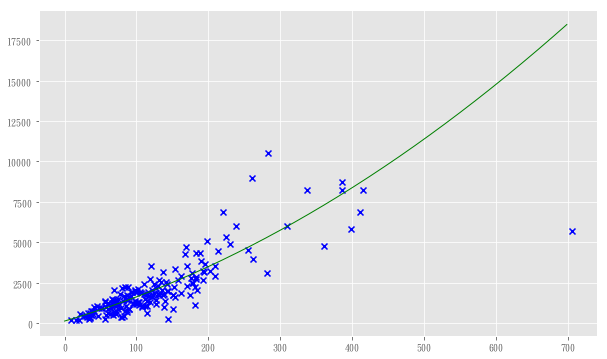

In [40]:
#linear regression
regr = linear_model.LinearRegression()

#訓練模型
regr.fit(X_train_poly, y_train)

print('各變項參數: \n', regr.coef_)
print("MSE: %.2f" % np.mean((regr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",regr.score(X_test_poly, y_test))

# Plot outputs
plt.figure(figsize=(10,6))
plt.scatter(X_test_raw, y_test,  color='blue', marker = 'x')

X_fit = pd.DataFrame(np.arange(0,700,1)) #作圖用
plt.plot(X_fit, regr.predict(PolyFeature.fit_transform(X_fit)), color='green', linewidth=1)


plt.show()

<module 'matplotlib.pyplot' from 'c:\\users\\jeff\\ml_1\\pyds\\lib\\site-packages\\matplotlib\\pyplot.py'>

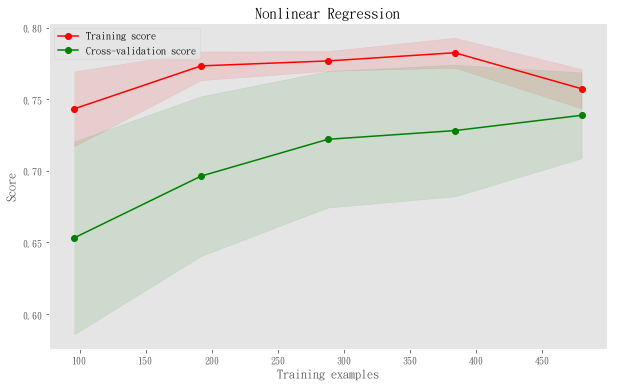

In [41]:
# k-fold cross validation
polyFeature = PolynomialFeatures(degree=2)
X_raw = X.copy() #原始X_train
X_poly = polyFeature.fit_transform(X_raw) 

cv = KFold(n_splits=4, random_state=None, shuffle=True)
estimater = linear_model.LinearRegression()
plot_learning_curve(estimater, 'Nonlinear Regression', X_poly, y, cv=cv, 
                    train_sizes=np.linspace(0.2, 1 ,5))